<a href="https://colab.research.google.com/github/ss0610/NoLimitCpp/blob/main/Fuzzy_Logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Problem description

**Antecedents (inputs)**

Service: How would you rate the service on a scale of 0 to 10?
- bad, good, great

Food Quality: How good was the food, on a scale of 0-10?
- bad, good, great

**Consequences (outputs)**

Tip: How much would you tip, between 0% and 20%?
- low, medium, high

Rules
- If the food quality is *bad* or the service is *bad* then the tip will be *low*
- If the service is *medium* then the tip will be *medium*
- If the service is *good* and the food quality is *great* then the tip will be *high*


Install Library

In [48]:
!pip install scikit-fuzzy

In [49]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Antecedents and consequent

In [50]:
np.arange(0,11,1)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [51]:
quality=ctrl.Antecedent(np.arange(0,11,1),'quality')
service=ctrl.Antecedent(np.arange(0,11,1),'service')

In [52]:
quality

Antecedent: quality

In [53]:
quality.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [54]:
tip=ctrl.Consequent(np.arange(0,21,1),'tip')

In [55]:
tip.universe

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

Membership functions

In [56]:
quality.automf(number=3,names=['bad','medium','good'])
service.automf(number=3,names=['bad','medium','good'])

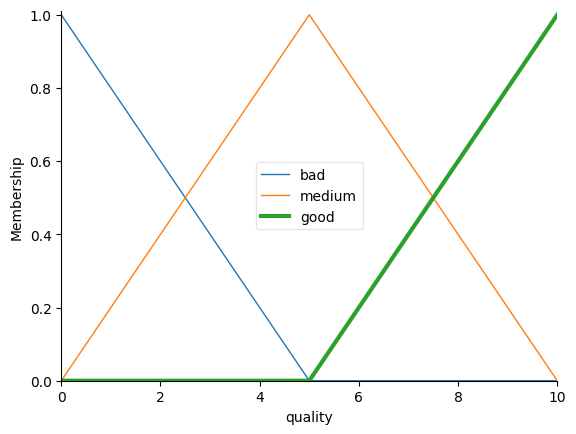

In [57]:
quality['good'].view()

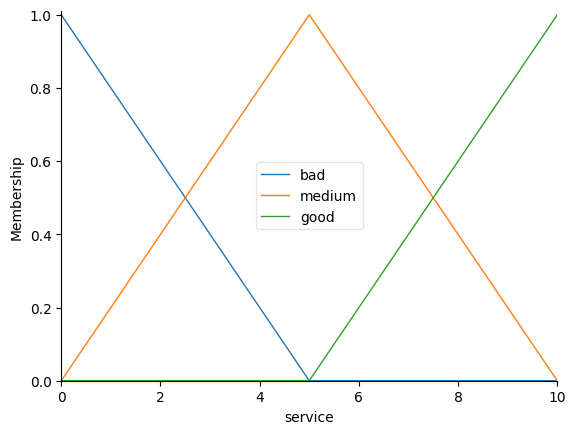

In [58]:
service.view()

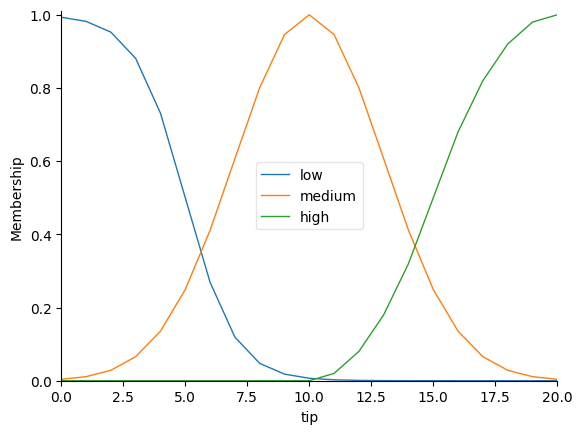

In [59]:
tip['low']=fuzz.sigmf(tip.universe,5,-1)
tip['medium']=fuzz.gaussmf(tip.universe,10,3)
tip['high']=fuzz.pimf(tip.universe,10,20,20,21)
tip.view()

In [60]:
rule1=ctrl.Rule(quality['bad']|service['bad'],tip['low'])
rule2=ctrl.Rule(service['medium'],tip['medium'])
rule3=ctrl.Rule(service['good']|quality['good'],tip['high'])

Control System

In [61]:
control_system = ctrl.ControlSystem([rule1,rule2,rule3])
system = ctrl.ControlSystemSimulation(control_system)

17.06666666666667


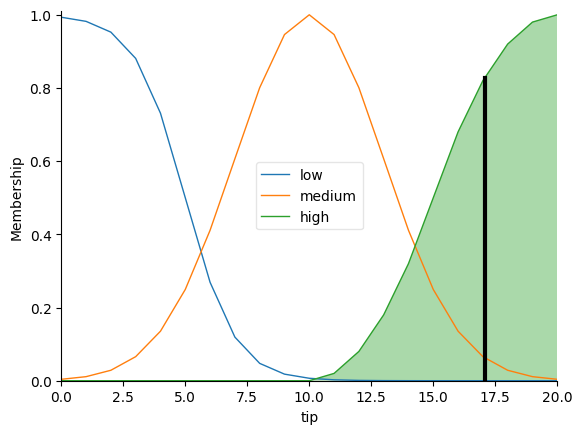

In [62]:
system.input['quality']=10
system.input['service'] =10
system.compute()
print(system.output['tip'])
tip.view(sim =system)